In [23]:
import pandas as pd
import sns
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
wine = pd.read_csv(r"D:\DAIAugust2025\ML\250840128012_PML\Wine.csv")
wine.head()
wine['target']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [25]:
# wine['target'].unique()
X = wine.drop('target', axis=1)
y = wine['target']

In [14]:

ss = StandardScaler().set_output(transform='pandas')
# trns = make_column_transformer((ss,make_column_selector(dtype_exclude='object')))
X_trns = ss.fit_transform(X)

### Need for Scaling in PCA
Prevents features dominance of one particular feature. If values are disproportionate, it may lead to errors

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_trns)

X_pca.shape


(178, 2)

In [18]:
# explained variance ratio for PCA 1 and PCA 2
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [17]:
# their cumulative variance
np.cumsum(pca.explained_variance_ratio_) * 100

array([36.1988481 , 55.40633836])

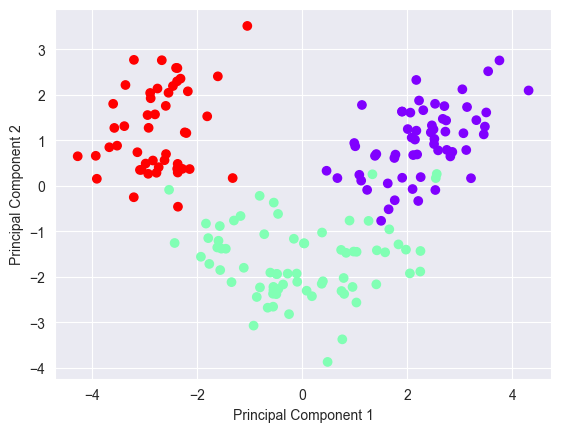

In [41]:
# X_pca_copy = X_pca.copy()
# X_pca_copy['target'] = y

# sns.scatterplot(data=X_pca_copy, x='pca0', y='pca1', hue='Class')
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c = y, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Whether PCA separates classes and suggest one practical implication
PCA is good for noise reduction and improves processing speed for supervised algorithms